In [2]:
import os
import statistics
import json
import glob
from matplotlib import pyplot as plt
from posixpath import basename
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import matplotlib
import csv

In [3]:
class Result:
    def __init__(self,solver_name_,block_size_,iter_,time_):
        self.solver_name=solver_name_
        self.block_size=block_size_
        self.time=time_
        self.iter=iter_

In [4]:
Hypre_block=[(86,78.7),(66,88.4),(57,76.9),(46,69.7)]
Hypre_scalar=[(633,93.4),(360,84.4),(268,88.8),(207,73.6)]
Hypre_degree=[1,2,3,4]
AMGCL_scalar=[(773,60.1),(390,56.8),(274,45.6),(210,43.2),(171,48.4),(146,37.2),(106,51.9),(87,47.3),(72,67.7)]
AMGCL_block=[(288,17.9),(163,17.4),(137,18.1),(101,17.0),(85,17.2),(76,15.2),(57,20.9),(48,16.2),(41,29.6)]
AMGCL_degree=[1,2,3,4,5,6,9,12,16]
AMGCL_Vcycle_scalar=[(1000,43.1),(554,30.5),(387,34.9),(297,30.5),(242,28.3),(207,24.0),(150,28.8),(123,29.3),(103,35.5)]
AMGCL_Vcycle_block=[(420,12.5),(238,11.7),(198,12.9),(145,11.8),(123,9.0),(110,9.5),(82,10.6),(69,10.7),(59,14.0)]
def df_create():
    columns=["Degree","Solver","Block Size","Runtime","Iterations"]
    result_df=pd.DataFrame(columns=columns)
    i=0
    for (iter,time),degree in zip(Hypre_scalar,Hypre_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="Hypre"
        df_row["Block Size"]=1
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    for (iter,time),degree in zip(Hypre_block,Hypre_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="Hypre"
        df_row["Block Size"]=3
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    for (iter,time),degree in zip(AMGCL_scalar,AMGCL_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="AMGCL"
        df_row["Block Size"]=1
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    for (iter,time),degree in zip(AMGCL_block,AMGCL_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="AMGCL"
        df_row["Block Size"]=3
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    return result_df
result_df=df_create()
def df_create():
    columns=["Degree","Solver","Block Size","Runtime","Iterations"]
    result_df=pd.DataFrame(columns=columns)
    i=0
    for (iter,time),degree in zip(AMGCL_Vcycle_scalar,AMGCL_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="AMGCL"
        df_row["Block Size"]=1
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    for (iter,time),degree in zip(AMGCL_Vcycle_block,AMGCL_degree):
        df_row={}
        df_row["Degree"]=degree
        df_row["Solver"]="AMGCL"
        df_row["Block Size"]=3
        df_row["Runtime"]=time
        df_row["Iterations"]=iter
        result_df.loc[i]=df_row
        i=i+1
    return result_df
result_df_Vcycle=df_create()
cmap=['b','g','r','c','m','y','k','w']

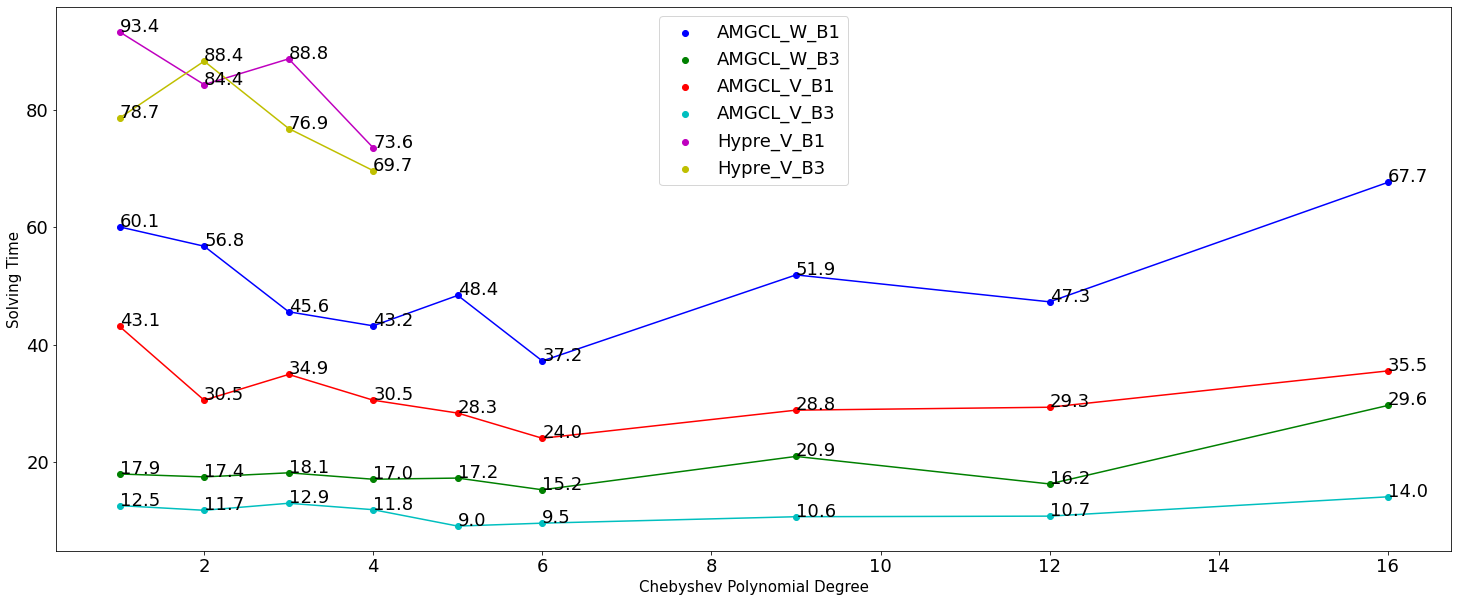

In [5]:
def fit(solver_name_,block_size_,ax_,df,cmap_,cindex_):
    degree=1    
    tempdf=df[(df["Block Size"]==block_size_) & (df["Solver"]==solver_name_)]
    tempdf=tempdf.sort_values(by=['Degree'])
    xdata=np.int64(tempdf['Degree'])
    ydata=np.float64(tempdf["Runtime"])
    if solver_name_=="Eigen::CholmodSupernodalLLT":
        label_="Cholmod"
    elif solver_name_=="Eigen::PardisoLDLT":
        label_="Pardiso"
    else:
        label_=solver_name_+"_W_"+"B"+str(block_size_)
    ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
    ax_.plot(xdata,ydata,color=cmap_[cindex_])

    # ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    # label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    if np.isscalar(ydata):
        ax_.annotate('%.1f'%ydata, (xdata[0], ydata))
    else:
        for i in range(len(xdata)):
            ax_.annotate('%.1f'%ydata[i], (xdata[i], ydata[i]))
solver_list=["AMGCL","Hypre","Eigen::CholmodSupernodalLLT","Eigen::PardisoLDLT"]
num_threads=np.sort(np.int64(result_df["Degree"].unique()))
fig,ax=plt.subplots(figsize=(25,10)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
ax.set_xlabel('Chebyshev Polynomial Degree',fontsize=15) # x labels
ax.set_ylabel("Solving Time",fontsize=15) # y labels
fit("AMGCL",1,ax,result_df,cmap,0)
fit("AMGCL",3,ax,result_df,cmap,1)
def fit(solver_name_,block_size_,ax_,df,cmap_,cindex_):
    degree=1    
    tempdf=df[(df["Block Size"]==block_size_) & (df["Solver"]==solver_name_)]
    tempdf=tempdf.sort_values(by=['Degree'])
    xdata=np.int64(tempdf['Degree'])
    ydata=np.float64(tempdf["Runtime"])
    if solver_name_=="Eigen::CholmodSupernodalLLT":
        label_="Cholmod"
    elif solver_name_=="Eigen::PardisoLDLT":
        label_="Pardiso"
    else:
        label_=solver_name_+"_V_"+"B"+str(block_size_)
    ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
    ax_.plot(xdata,ydata,color=cmap_[cindex_])

    # ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    # label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    if np.isscalar(ydata):
        ax_.annotate('%.1f'%ydata, (xdata[0], ydata))
    else:
        for i in range(len(xdata)):
            ax_.annotate('%.1f'%ydata[i], (xdata[i], ydata[i]))
fit("AMGCL",1,ax,result_df_Vcycle,cmap,2)
fit("AMGCL",3,ax,result_df_Vcycle,cmap,3)
fit("Hypre",1,ax,result_df,cmap,4)
fit("Hypre",3,ax,result_df,cmap,5)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.legend()

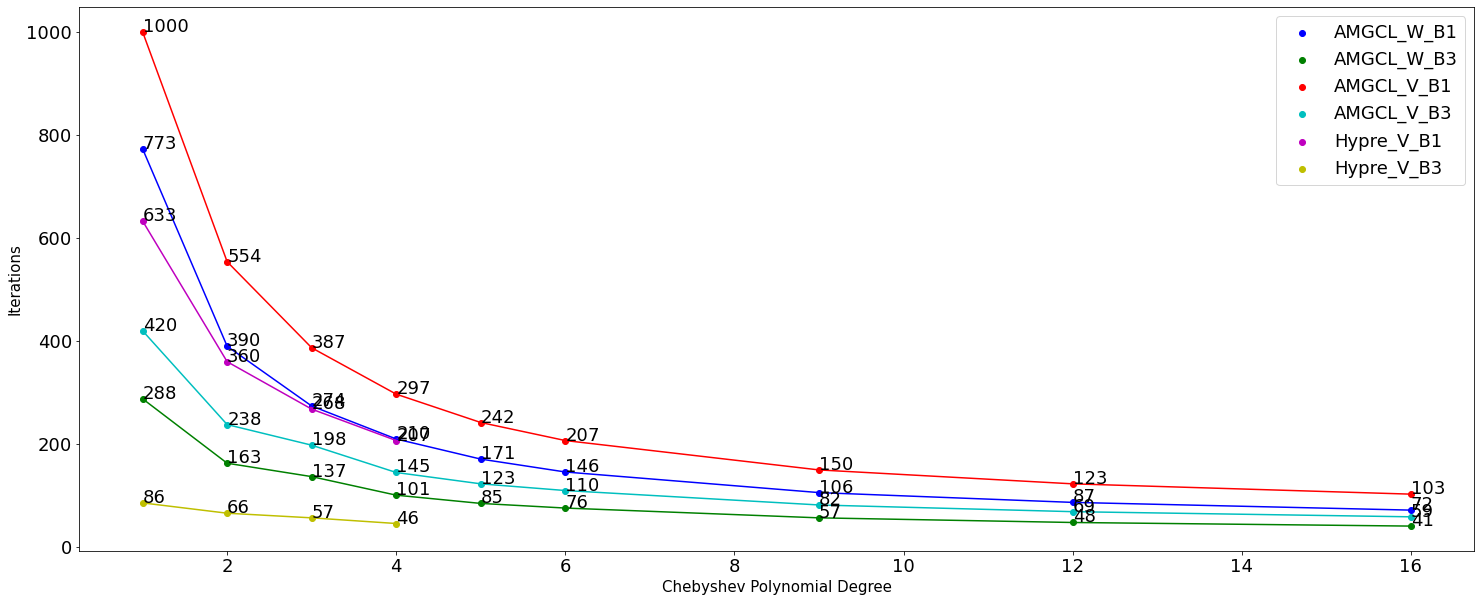

In [7]:
def fit(solver_name_,block_size_,ax_,df,cmap_,cindex_):
    degree=1    
    tempdf=df[(df["Block Size"]==block_size_) & (df["Solver"]==solver_name_)]
    tempdf=tempdf.sort_values(by=['Degree'])
    xdata=np.int64(tempdf['Degree'])
    ydata=np.float64(tempdf["Iterations"])
    if solver_name_=="Eigen::CholmodSupernodalLLT":
        label_="Cholmod"
    elif solver_name_=="Eigen::PardisoLDLT":
        label_="Pardiso"
    else:
        label_=solver_name_+"_W_"+"B"+str(block_size_)
    ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
    ax_.plot(xdata,ydata,color=cmap_[cindex_])

    # ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    # label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    if np.isscalar(ydata):
        ax_.annotate('%d'%ydata, (xdata[0], ydata))
    else:
        for i in range(len(xdata)):
            ax_.annotate('%d'%ydata[i], (xdata[i], ydata[i]))
solver_list=["AMGCL","Hypre","Eigen::CholmodSupernodalLLT","Eigen::PardisoLDLT"]
num_threads=np.sort(np.int64(result_df["Degree"].unique()))
fig,ax=plt.subplots(figsize=(25,10)) # figure size
plt.rcParams.update({'font.size': 18}) # font size
ax.set_xlabel('Chebyshev Polynomial Degree',fontsize=15) # x labels
ax.set_ylabel("Iterations",fontsize=15) # y labels
fit("AMGCL",1,ax,result_df,cmap,0)
fit("AMGCL",3,ax,result_df,cmap,1)
def fit(solver_name_,block_size_,ax_,df,cmap_,cindex_):
    degree=1    
    tempdf=df[(df["Block Size"]==block_size_) & (df["Solver"]==solver_name_)]
    tempdf=tempdf.sort_values(by=['Degree'])
    xdata=np.int64(tempdf['Degree'])
    ydata=np.float64(tempdf["Iterations"])
    if solver_name_=="Eigen::CholmodSupernodalLLT":
        label_="Cholmod"
    elif solver_name_=="Eigen::PardisoLDLT":
        label_="Pardiso"
    else:
        label_=solver_name_+"_V_"+"B"+str(block_size_)
    ax_.scatter(xdata,ydata,label=label_,color=cmap_[cindex_])
    ax_.plot(xdata,ydata,color=cmap_[cindex_])

    # ax_.scatter(xdata,ydata,color=cmap_[cindex_])
    # label_=label_+", k="+str("%.2f" % coeffs[degree-1])
    # ax_.plot(xdata,yfit(xdata),label=label_,color=cmap_[cindex_])
    if np.isscalar(ydata):
        ax_.annotate('%d'%ydata, (xdata[0], ydata))
    else:
        for i in range(len(xdata)):
            ax_.annotate('%d'%ydata[i], (xdata[i], ydata[i]))
fit("AMGCL",1,ax,result_df_Vcycle,cmap,2)
fit("AMGCL",3,ax,result_df_Vcycle,cmap,3)
fit("Hypre",1,ax,result_df,cmap,4)
fit("Hypre",3,ax,result_df,cmap,5)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18, rotation=0)
ax.legend()